In [51]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 
%matplotlib inline 

#Lê as entradas
f = open("dados_autent_bancaria.txt")
data = np.loadtxt(f, delimiter=',')

#Separa os dados para treino e teste
# 80% de cada classe para treino e 20% para teste
def split_data(data):
    class_a = []
    class_b = []
    for d in data:
        if(d[-1] == 0):
            class_a.append(d)
        else:
            class_b.append(d)
    
    num_class_a = len(class_a)
    num_class_b = len(class_b)
    
    # 80% de cada classe para treino
    split_point_a = round(num_class_a * 0.8) 
    split_point_b = round(num_class_b * 0.8)
    
    return class_a[:split_point_a], class_a[split_point_a:], class_b[:split_point_b], class_b[split_point_b:]
    
train_a, test_a, train_b, test_b = split_data(data)




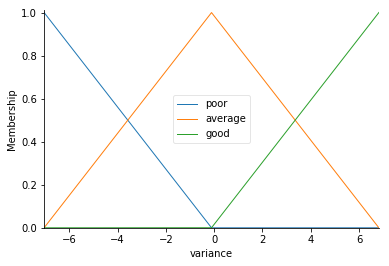

In [80]:

variance = ctrl.Antecedent(sorted(data[:, 0]), 'variance')
skewness = ctrl.Antecedent(sorted(data[:, 1]), 'skewness')
curtosis = ctrl.Antecedent(sorted(data[:, 2]), 'curtosis')
entropy = ctrl.Antecedent(sorted(data[:, 3]), 'entropy')


variance.automf(3)
skewness.automf(3)
curtosis.automf(3)
entropy.automf(3)


variance.view()
# skewness.view()
# curtosis.view()
# entropy.view()

-7.0421
6.8248
6.93345
[1.         0.98557717 0.97115433 0.9567315  0.94230866 0.92788583
 0.91346299 0.89904016 0.88461733 0.87019449 0.85577166 0.84134882
 0.82692599 0.81250315 0.79808032 0.78365749 0.76923465 0.75481182
 0.74038898 0.72596615 0.71154332 0.69712048 0.68269765 0.66827481
 0.65385198 0.63942914 0.62500631 0.61058348 0.59616064 0.58173781
 0.56731497 0.55289214 0.5384693  0.52404647 0.50962364 0.4952008
 0.48077797 0.46635513 0.4519323  0.43750946 0.42308663 0.4086638
 0.39424096 0.37981813 0.36539529 0.35097246 0.33654963 0.32212679
 0.30770396 0.29328112 0.27885829 0.26443545 0.25001262 0.23558979
 0.22116695 0.20674412 0.19232128 0.17789845 0.16347561 0.14905278
 0.13462995 0.12020711 0.10578428 0.09136144 0.07693861 0.06251577
 0.04809294 0.03367011 0.01924727 0.00482444 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.   

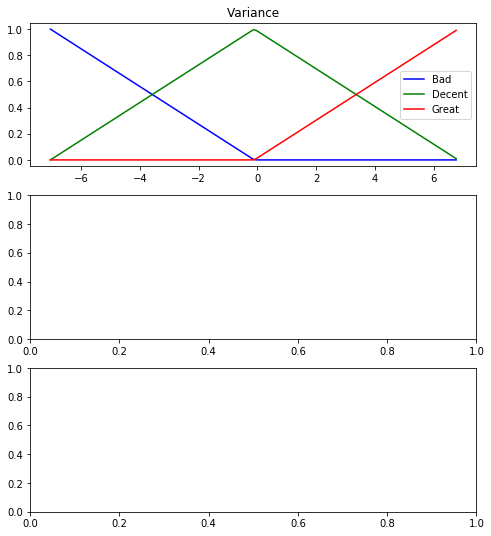

In [90]:



variance_data = sorted(data[:, 0])
min_v = variance_data[0]
max_v = variance_data[-1]

step = (max_v - min_v) / 2


print(min_v)
print(max_v)
print(step)

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(min_v, max_v, 0.1)
# x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [min_v, min_v, (min_v + step)])
qual_md = fuzz.trimf(x_qual, [min_v, (min_v + step), max_v])
qual_hi = fuzz.trimf(x_qual, [(min_v + step), max_v, max_v])
# serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
# serv_md = fuzz.trimf(x_serv, [0, 5, 10])
# serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

print(qual_lo)

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))




# Turn off top/right axes
# ax0.spines['top'].set_visible(False)
# ax0.spines['right'].set_visible(False)
# ax0.get_xaxis().tick_bottom()
# ax0.get_yaxis().tick_left()
    
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Variance')
ax0.legend()


In [103]:

from pprint import pprint

pprint(dir(variance['poor'].cuts))
np.fmin(variance['poor'], skewness)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_sim_data',
 'clear',
 'default']


ValueError: Membership function '0' does not exist for Antecedent skewness.
Available options: 'poor'; 'average', or 'good'.